In [7]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img = cv2.imread('../DATA/sammy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
type(img)

numpy.ndarray

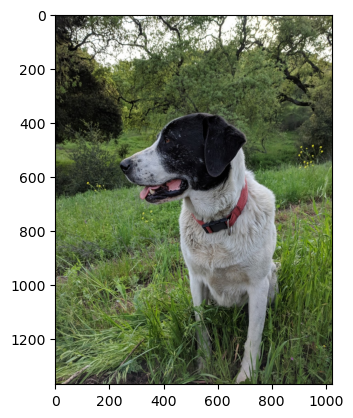

In [9]:
plt.imshow(img)

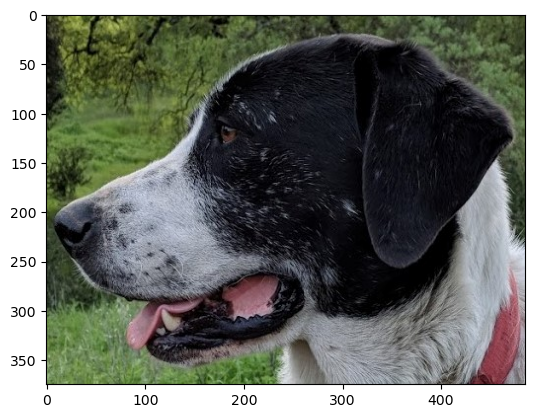

In [10]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [11]:
mystring = 'sum'
eval(mystring)

<function sum(iterable, /, start=0)>

In [12]:
myfunc = eval(mystring)
myfunc([1,2,3])

6

https://en.wikipedia.org/wiki/Template_matching

In [13]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

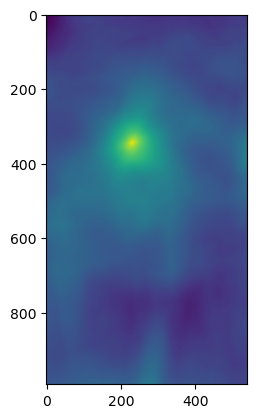

In [14]:
#For one method
#Is shows heatmap where program thinks is a match
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(img, face, my_method)
plt.imshow(res)

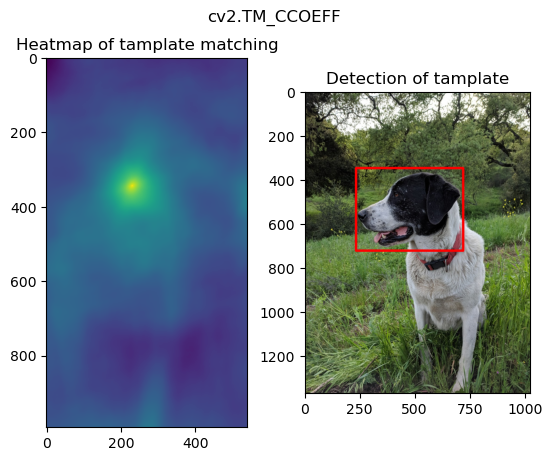

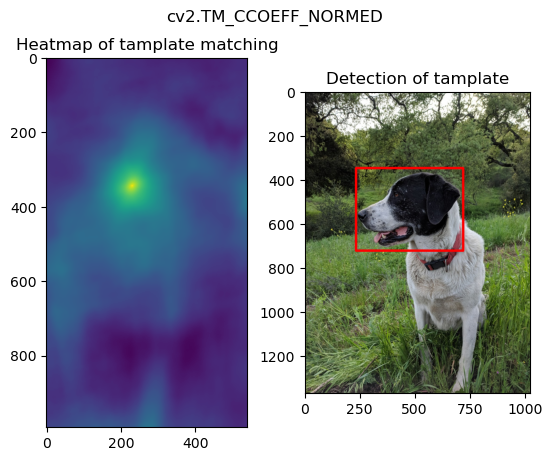

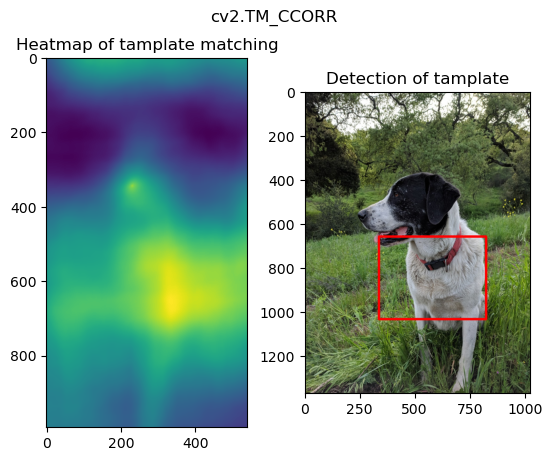

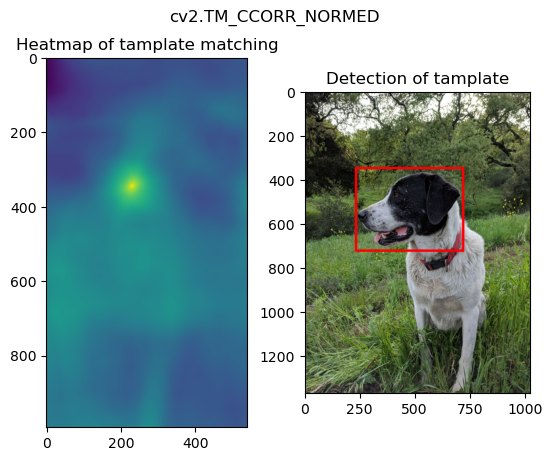

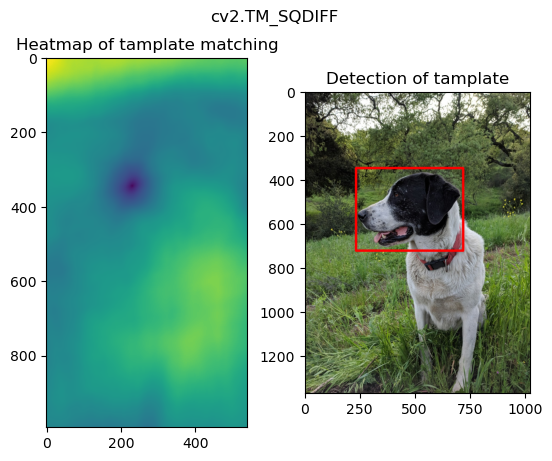

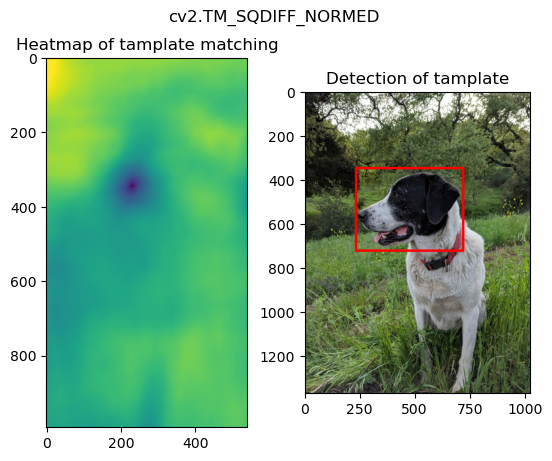

In [15]:
for m in methods:
    
    #Create the copy of image
    img_copy = img.copy()
    
    method = eval(m)
    
    #Template matchin
    res = cv2.matchTemplate(img_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, color = face.shape
    
    bot_right = (top_left[0] + width, top_left[1]+height)
    cv2.rectangle(img_copy, top_left, bot_right, (255,0,0), thickness=10)
    
    #Plot
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of tamplate matching')
    
    plt.subplot(122)
    plt.imshow(img_copy)
    plt.title('Detection of tamplate')
    plt.suptitle(m)
    plt.show()
    
    